# **Account Validation Steps**

In [4]:
!pip install -q kaggle    # Install the Kaggle CLI

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# **Import Libraries**

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model_results=[]

# **Download Dataset from Kaggle and Unzip it.**

In [150]:
!kaggle datasets download -d nelgiriyewithana/world-stock-prices-daily-updating

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/world-stock-prices-daily-updating
License(s): other
world-stock-prices-daily-updating.zip: Skipping, found more recently modified local copy (use --force to force download)


In [151]:
#Unzipping the dataset file
import zipfile
zip_ref = zipfile.ZipFile('/content/world-stock-prices-daily-updating.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [152]:
df=pd.read_csv('/content/world-stock-prices-daily-updating.zip')

# **Data Visualization**

In [52]:
df

,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits
0,5.020000,5.290000,4.632000,5.030000,18752245.0,peloton,PTON,fitness,usa,0.0,0.0
1,5.020000,5.290000,4.632000,5.030000,18775100.0,peloton,PTON,fitness,usa,0.0,0.0
2,77.485001,78.269997,69.839996,76.889999,29602188.0,shopify,SHOP,e-commerce,canada,0.0,0.0
3,955.000000,964.520020,914.498901,916.479980,5157203.0,costco,COST,retail,usa,0.0,0.0
4,167.145004,178.143600,166.000000,171.000000,118861321.0,amazon,AMZN,e-commerce,usa,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
306050,7.534477,7.534477,7.363591,7.472337,490860.0,unilever,UL,consumer goods,netherlands,0.0,0.0
306051,35.788786,36.844503,34.627498,36.263859,1734000.0,fedex,FDX,logistics,usa,0.0,0.0
306052,34.729481,34.729481,32.934947,33.198849,6471267.0,american express,AXP,finance,usa,0.0,0.0
306053,22.361069,22.431057,21.801168,22.186100,4520600.0,mcdonald's,MCD,food,usa,0.0,0.0


In [53]:
df.shape

(306055, 11)

In [54]:
#Count of null (NaN) values in each column
df.isnull().sum().sort_values(ascending=False)

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Brand_Name,0
Ticker,0
Industry_Tag,0
Country,0
Dividends,0


In [55]:
# Give summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306055 entries, 0 to 306054
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Open          306055 non-null  float64
 1   High          306055 non-null  float64
 2   Low           306055 non-null  float64
 3   Close         306055 non-null  float64
 4   Volume        306055 non-null  float64
 5   Brand_Name    306055 non-null  object 
 6   Ticker        306055 non-null  object 
 7   Industry_Tag  306055 non-null  object 
 8   Country       306055 non-null  object 
 9   Dividends     306055 non-null  float64
 10  Stock Splits  306055 non-null  float64
dtypes: float64(7), object(4)
memory usage: 25.7+ MB


In [56]:
# This code calculates and sorts the percentage of missing values in each column
# of a DataFrame.
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage.sort_values(ascending=False)

,0
Open,0.0
High,0.0
Low,0.0
Close,0.0
Volume,0.0
Brand_Name,0.0
Ticker,0.0
Industry_Tag,0.0
Country,0.0
Dividends,0.0


### **Stock Price Over Time**

In [57]:
netflix = df[df['Brand_Name'].str.lower() == 'netflix'].copy()
netflix['Date'] = pd.to_datetime(netflix['Date'], utc=True)

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(netflix['Date'], netflix['Close'], label='Close Price', color='purple')
plt.title('Netflix Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Show x-axis ticks every 2 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

KeyError: 'Date'

### **Candlestick Chart**

In [ ]:
amd_data = df[df['Ticker'] == 'AMD']

fig = go.Figure(data=[go.Candlestick(
    x=amd_data['Date'],
    open=amd_data['Open'],
    high=amd_data['High'],
    low=amd_data['Low'],
    close=amd_data['Close']
)])
fig.update_layout(title='AMD Stock Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

### **Volume Over Time**

In [ ]:
amd_data = df[df['Ticker'] == 'AMD'].copy()
amd_data['Date'] = pd.to_datetime(amd_data['Date'], utc=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(amd_data['Date'], amd_data['Volume'], color='orange')
plt.title('AMD Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in Millions)')

# Format x-axis to show year every 2 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Format y-axis to show volume in millions (e.g., 50M)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))

plt.tight_layout()
plt.show()

### **Box Plot of Daily Close Prices for First 10 Stocks**

In [ ]:
top10 = df['Ticker'].value_counts().nlargest(10)

df_top10 = df[df['Ticker'].isin(top10.index)].copy()

df_top10['Ticker'] = pd.Categorical(df_top10['Ticker'], categories=top10.index, ordered=True)

plt.figure(figsize=(14, 6))
sns.boxplot(x='Ticker', y='Close', data=df_top10)
plt.title('Top 10 Stocks by Frequency: Close Price Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Average Closing Price by Industry**

In [ ]:
avg_close = df.groupby('Industry_Tag')['Close'].mean().sort_values(ascending=False)
avg_close.plot(kind='bar', figsize=(14,6), title='Average Close Price by Industry')
plt.ylabel('Average Close Price')
plt.show()

# **Preprocessing Steps**

In [153]:
duplicate_records = df[df.duplicated()]
print("Number of duplicate records:", len(duplicate_records))

Number of duplicate records: 0


In [154]:
df.isnull().all()

,0
Date,False
Open,False
High,False
Low,False
Close,False
Volume,False
Brand_Name,False
Ticker,False
Industry_Tag,False
Country,False


In [155]:
df.drop(columns=['Capital Gains', 'Date'], inplace=True)

In [156]:
df.shape

(306055, 11)

In [157]:
X = df.drop('Close', axis=1)
y = df['Close']

In [158]:
X

,Open,High,Low,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits
0,5.020000,5.290000,4.632000,18752245.0,peloton,PTON,fitness,usa,0.0,0.0
1,5.020000,5.290000,4.632000,18775100.0,peloton,PTON,fitness,usa,0.0,0.0
2,77.485001,78.269997,69.839996,29602188.0,shopify,SHOP,e-commerce,canada,0.0,0.0
3,955.000000,964.520020,914.498901,5157203.0,costco,COST,retail,usa,0.0,0.0
4,167.145004,178.143600,166.000000,118861321.0,amazon,AMZN,e-commerce,usa,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
306050,7.534477,7.534477,7.363591,490860.0,unilever,UL,consumer goods,netherlands,0.0,0.0
306051,35.788786,36.844503,34.627498,1734000.0,fedex,FDX,logistics,usa,0.0,0.0
306052,34.729481,34.729481,32.934947,6471267.0,american express,AXP,finance,usa,0.0,0.0
306053,22.361069,22.431057,21.801168,4520600.0,mcdonald's,MCD,food,usa,0.0,0.0


In [159]:
y

,Close
0,5.030000
1,5.030000
2,76.889999
3,916.479980
4,171.000000
...,...
306050,7.472337
306051,36.263859
306052,33.198849
306053,22.186100


### **One Hot Encoding**

In [160]:
X = pd.get_dummies(X, columns=['Brand_Name', 'Ticker', 'Industry_Tag', 'Country'], drop_first=True)

# **Train Test Split**

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# **Linear Regression**

In [162]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [163]:
y_pred = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred)

print(f"MAE: {mae_linear}")
print(f"MSE: {mse_linear}")
print(f"RMSE: {rmse_linear}")
print(f"R² Score: {r2_linear}")

MAE: 0.3840401817494079
MSE: 1.2665040650023556
RMSE: 1.1253906277388113
R² Score: 0.9999317629424443


In [164]:
# Print a comparison of actual and predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price':y_pred})

# Show top 10 rows
print(comparison_df.head(20))

    Actual Price  Predicted Price
0      24.639999        24.844502
1     148.899994       148.827748
2      59.467102        59.613613
3      21.025333        21.251587
4      12.027976        12.099894
5       0.305036         0.333586
6      20.888029        20.931266
7       5.329479         5.260133
8      13.011365        13.023551
9     163.360001       163.951341
10     26.229353        26.145504
11     14.372452        14.214195
12      9.230000         9.467732
13     17.238571        17.471808
14     93.343742        93.813150
15     27.595345        27.621948
16     37.441280        37.648453
17    514.010010       510.969368
18    264.506500       262.841773
19     28.820000        28.841438


In [165]:
y_pred = linear_model.predict(X_test)
if not any(result['Model'] == 'Linear Regression' for result in model_results):
  model_results.append({
      'Model': 'Linear Regression',
      'MAE': mean_absolute_error(y_test, y_pred),
      'MSE': mean_squared_error(y_test, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
      'R² Score': r2_score(y_test, y_pred)
      })

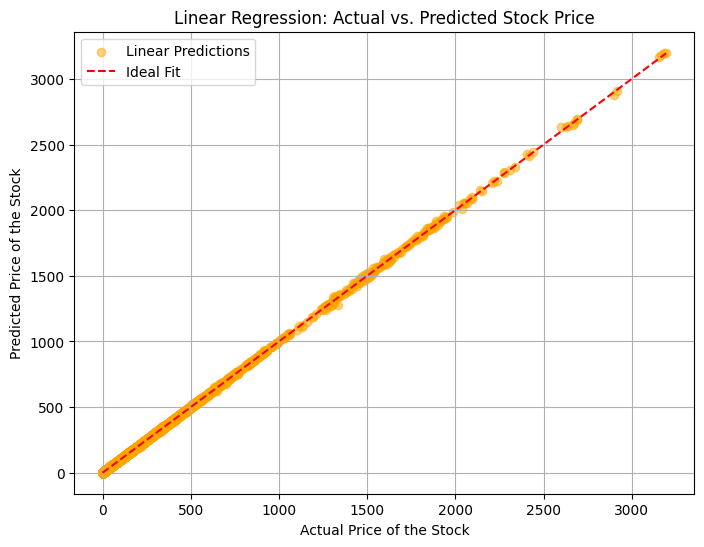

In [166]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange', alpha=0.5, label='Linear Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Price of the Stock')
plt.ylabel('Predicted Price of the Stock')
plt.title('Linear Regression: Actual vs. Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()

# **Ridge**

In [167]:
from sklearn.linear_model import Ridge

In [168]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

Ill-conditioned matrix (rcond=1.32781e-22): result may not be accurate.



Ridge(alpha=1)

In [169]:
y_pred = ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred)
mse_ridge = mean_squared_error(y_test, y_pred)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred)

print(f"MAE: {mae_ridge}")
print(f"MSE: {mse_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"R² Score: {r2_ridge}")

MAE: 0.38403981869464215
MSE: 1.2665033116631086
RMSE: 1.1253902930375348
R² Score: 0.999931762983033


In [170]:
# Print a comparison of actual and predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price':y_pred})

# Show top 10 rows
print(comparison_df.head(20))

    Actual Price  Predicted Price
0      24.639999        24.844497
1     148.899994       148.827715
2      59.467102        59.613613
3      21.025333        21.251575
4      12.027976        12.099894
5       0.305036         0.333587
6      20.888029        20.931266
7       5.329479         5.260135
8      13.011365        13.023550
9     163.360001       163.951337
10     26.229353        26.145518
11     14.372452        14.214197
12      9.230000         9.467731
13     17.238571        17.471803
14     93.343742        93.813155
15     27.595345        27.621948
16     37.441280        37.648455
17    514.010010       510.969342
18    264.506500       262.841782
19     28.820000        28.841439


In [171]:
y_pred = ridge_model.predict(X_test)
if not any(result['Model'] == 'Ridge Regression' for result in model_results):
  model_results.append({
      'Model': 'Ridge Regression',
      'MAE': mean_absolute_error(y_test, y_pred),
      'MSE': mean_squared_error(y_test, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
      'R² Score': r2_score(y_test, y_pred)
      })

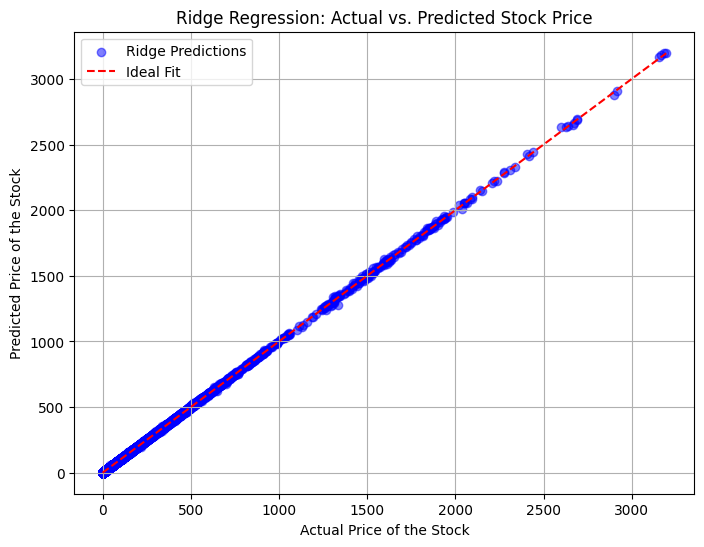

In [172]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Ridge Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Price of the Stock')
plt.ylabel('Predicted Price of the Stock')
plt.title('Ridge Regression: Actual vs. Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()


# **Lasso**

In [173]:
from sklearn.linear_model import Lasso

In [174]:
lasso_model=Lasso(alpha=1)
lasso_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.762e+05, tolerance: 4.848e+05



Lasso(alpha=1)

In [175]:
y_pred = lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred)
mse_lasso = mean_squared_error(y_test, y_pred)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred)

print(f"MAE: {mae_lasso}")
print(f"MSE: {mse_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"R² Score: {r2_lasso}")

MAE: 0.7646215231944933
MSE: 5.094691384763079
RMSE: 2.257142304942929
R² Score: 0.9997255068034466


In [176]:
y_pred = lasso_model.predict(X_test)
if not any(result['Model'] == 'Lasso Regression' for result in model_results):
  model_results.append({
      'Model': 'Lasso Regression',
      'MAE': mean_absolute_error(y_test, y_pred),
      'MSE': mean_squared_error(y_test, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
      'R² Score': r2_score(y_test, y_pred)
      })

In [177]:
# Print a comparison of actual and predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price':y_pred})

# Show top 10 rows
print(comparison_df.head(20))

    Actual Price  Predicted Price
0      24.639999        24.754230
1     148.899994       146.478958
2      59.467102        59.614320
3      21.025333        21.745969
4      12.027976        12.024572
5       0.305036         0.254734
6      20.888029        20.747164
7       5.329479         5.334848
8      13.011365        12.762645
9     163.360001       163.184274
10     26.229353        26.221627
11     14.372452        14.279193
12      9.230000         9.132313
13     17.238571        17.457095
14     93.343742        95.270389
15     27.595345        28.008146
16     37.441280        37.983164
17    514.010010       497.806886
18    264.506500       265.499404
19     28.820000        29.015282


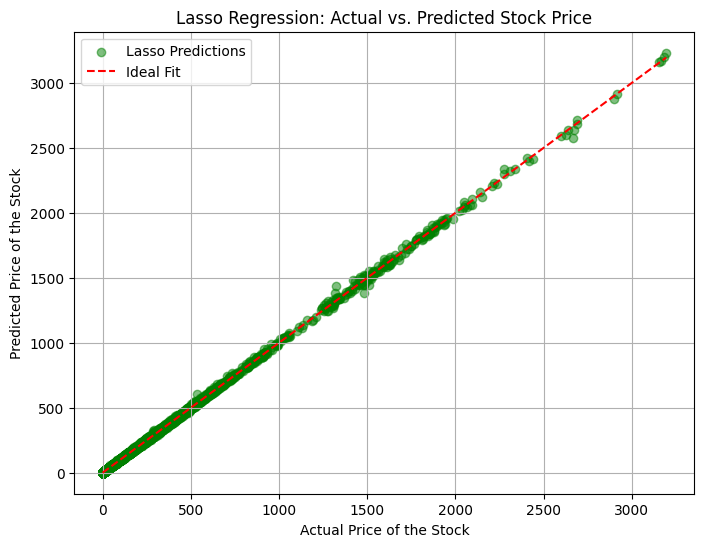

In [178]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Lasso Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Price of the Stock')
plt.ylabel('Predicted Price of the Stock')
plt.title('Lasso Regression: Actual vs. Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()

# **Decision Tree Rrgressor**

In [186]:
from sklearn.tree import DecisionTreeRegressor

In [187]:
decision_tree=DecisionTreeRegressor(random_state=99)
decision_tree.fit(X_train, y_train)

KeyboardInterrupt: 

In [181]:
y_pred = decision_tree.predict(X_test)
mae_decision_tree = mean_absolute_error(y_test, y_pred)
mse_decision_tree = mean_squared_error(y_test, y_pred)
rmse_decision_tree = np.sqrt(mse_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred)


print(f"MAE: {mae_decision_tree}")
print(f"MSE: {mse_decision_tree}")
print(f"RMSE: {rmse_decision_tree}")
print(f"R² Score: {r2_decision_tree}")

MAE: 0.5281623809200369
MSE: 3.2277208356454308
RMSE: 1.7965858831810493
R² Score: 0.9998260959609039


In [ ]:
y_pred = decision_tree.predict(X_test)
if not any(result['Model'] == 'Decision Tree' for result in model_results):
  model_results.append({
      'Model': 'Decision Tree',
      'MAE': mean_absolute_error(y_test, y_pred),
      'MSE': mean_squared_error(y_test, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
      'R² Score': r2_score(y_test, y_pred)
      })

In [ ]:
# Print a comparison of actual and predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price':y_pred})

# Show top 10 rows
print(comparison_df.head(20))

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green', label='Decision Tree Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Price of the Stock')
plt.ylabel('Predicted Price of the Stock')
plt.title('Decision Tree: Actual vs. Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()

# **Random Forest Regressor**

In [148]:
from sklearn.ensemble import RandomForestRegressor

In [185]:
random_forest=RandomForestRegressor(random_state=99)
random_forest.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = random_forest.predict(X_test)
mae_random_forest = mean_absolute_error(y_test, y_pred)
mse_random_forest = mean_squared_error(y_test, y_pred)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred)


print(f"MAE: {mae_random_forest}")
print(f"MSE: {mse_random_forest}")
print(f"RMSE: {rmse_random_forest}")
print(f"R² Score: {r2_random_forest}")

In [ ]:
y_pred = random_forest.predict(X_test)
if not any(result['Model'] == 'Random Forest' for result in model_results):
  model_results.append({
      'Model': 'Random Forest',
      'MAE': mean_absolute_error(y_test, y_pred),
      'MSE': mean_squared_error(y_test, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
      'R² Score': r2_score(y_test, y_pred)
      })

In [ ]:
# Print a comparison of actual and predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price':y_pred})

# Show top 10 rows
print(comparison_df.head(20))

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green', label='Random Forest Prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Price of the Stock')
plt.ylabel('Predicted Price of the Stock')
plt.title('Random Forest: Actual vs. Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()

# **Side by Side Comparison**

In [147]:
pd.DataFrame(model_results)

,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,0.384040,1.266504,1.125391,0.999932
1,Ridge Regression,0.383548,1.263578,1.124090,0.999932
2,Lasso Regression,0.767953,5.104035,2.259211,0.999725
3,Decision Tree,0.528162,3.227721,1.796586,0.999826
